# Emojis

https://github.com/uclnlp/emoji2vec

In [ ]:
!pip install emoji2vec

ERROR: Could not find a version that satisfies the requirement emoji2vec (from versions: none)
ERROR: No matching distribution found for emoji2vec


In [ ]:
import gensim.models as gsm

e2v = gsm.KeyedVectors.load_word2vec_format('/content/emoji2vec.bin', binary=True)
happy_vector = e2v['😂']    # Produces an embedding vector of length 300

In [ ]:
happy_vector

In [ ]:
e2v.wv.vocab

In [ ]:
model=e2v

In [ ]:
model.wv.vocab['😂']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
model.wv.vocab.keys()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


dict_keys(['🇸🇰', '👔', '🌀', '🚾', '👹', '🚻', '👬', '🇫🇯', '🎧', '🐽', '🚜', '♋', '🚭', '🚷', '📅', '💈', '✔️', '🙎🏼', '🍸', '🤷', '🌂', '🚓', '🍤', '💘', '🚔', '👚', '🐧', '🍥', '🍵', '✂️', '👓', '⛔', '💂', '🆔', '😕', '🎎', '🏊🏻', '❗', '💭', '💬', '🎴', '♉', '⚖', '🇮🇩', '🛵', '⬅️', '📒', '😡', '🇲🇦', '🇨🇭', '🍦', '❗️', '🌐', '🎡', '🇿🇲', '🤒', '🔓', '🎻', '😹', '🚮', '👽', '🌝', '🇭🇺', '🐆', '🇰🇵', '💔', '🎅🏻', '👇🏽', '🍆', '👃🏽', '🐖', '😮', '✴️', '➗', '⌚', '🆎', '👻', '🗻', '🇨🇺', '😟', '💣', '💁', '🦀', '🇬🇭', '🎩', '🇼', '👉🏾', '🙊', '🍚', '🍙', '🚯', '👩🏿', '🇫🇷', '👸🏼', '😿', '😲', '🇲🇰', '🔢', '🚬', '💅', '🏀', '🍷', '🙈', '👭', '🍯', '🏰', '🖨', '🍨', '🆗', '😩', '🎉', '🤐', '🥡', '⚫️', '🏣', '🌹', '🌯', '🎆', '▶️', '🔮', '🙌', '🆚', '🙆', '🎒', '💆', '🔰', '🌜', '🌕', '🎑', '😳', '⚓', '🐫', '♐', '👂', '\ue50a', '💃', '🐼', '🍣', '🏧', '🎠', '🌴', '😏', '🛅', '💶', '⚽', '♎', '🏫', '😃', '🇸🇮', '🔒', '⛺', '🚥', '💵', '🍺', '💀', '🌅', '🐜', '♣️', '🔔', '🙆🏿', '💉', '💯', '🍕', '👣', '🍌', '🥔', '🐸', '👃🏻', '🍮', '💞', '👵🏽', '🇳🇬', '🚦', '🚣', '💕', '🐾', '🏂', '👎', '🐀', '🚝', '😻', '🛣', '🎈', '🐅', '🇭🇳', '🦃', '🐌', '🏋', '🌎', '✈️',

In [ ]:
#get the vocab dict from the emoji list
vocab=dict()

for i in Y:
  if(i in model.wv.vocab.keys()):
    vocab[i]=model.wv.vocab[i]

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model[model.wv.vocab]
# X=model[vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

def tsne_plot(for_word, w2v_model,num):
    # trained fastText model dimention
    dim_size = w2v_model.wv.vectors.shape[1]
 
    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']
 
    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)
 
    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=num)
 
    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
 
    #---------------------- Apply PCA and tsne to reduce dimention --------------
 
    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = num).fit_transform(arrays)
 
    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)
 
    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})
 
    #------------------------- tsne plot Python -----------------------------------
 
    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )
 
    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)
 
 
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
 
    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128590 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128590 missing from current font.
  font.set_text(s,

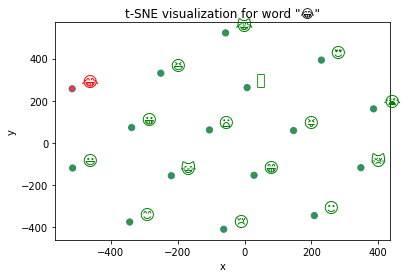

In [ ]:
tsne_plot(for_word='😂', w2v_model=model,num=15)

In [ ]:
# ideas to be discussed:

#map nearby emojis into same group!
#for this we may need to reduce the dimension/use k means clustering? or what?
#group the emojis into k groups & see where the elbow point lies

#data augmentation - same sentence with similar emoji labels using most similar emoji from e2v

In [ ]:
# list(Xemoji[0])

NameError: ignored

In [ ]:
#happy_vector = e2v['😂']    # Produces an embedding vector of length 300
Xemoji=model.wv.vocab.keys()
X=[]

for i in Xemoji:
  X.append(list(e2v[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [ ]:
import numpy as np
X=np.array(X)

## K means

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
X.shape

(1661, 300)

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

In [ ]:
# K = range(1,1661 )
K= range(1,1661)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)
  
	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)
	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_
  

In [ ]:
dis

In [ ]:
import pickle
with open('K142.pkl', 'wb') as f:
  pickle.dump(distortions, f)

In [ ]:
with open('K142.pkl', 'rb') as f:
  distortions = pickle.load(f)

In [ ]:
type(distortions)

list

In [ ]:
len(distortions)

142

[0.8989371400621455,
 0.8576952054094873,
 0.8449981097649767,
 0.8367803686703769,
 0.8307445154567149,
 0.8212515004767301,
 0.8160669461209787,
 0.815799545153311,
 0.8067111983667996,
 0.8042532800617345,
 0.7983900070759774,
 0.7964686117750359,
 0.7863919783527455,
 0.7866361536477727,
 0.78415834109409,
 0.7738410718592811,
 0.7734992478452254,
 0.7708487350987855,
 0.7647254472180393,
 0.7617475516509085,
 0.7640688902747951,
 0.7543664829510821,
 0.7543097010833869,
 0.7504882554934669,
 0.7498675132046791,
 0.7484944833370568,
 0.7463717740449914,
 0.7425099198886087,
 0.7434720974096184,
 0.7402398256689073,
 0.7373584985418401,
 0.7386183662940228,
 0.7364300579513341,
 0.7338293140605274,
 0.7314127450985027,
 0.7325290254989184,
 0.7279190094251382,
 0.7286245472991003,
 0.726902137061604,
 0.7249680591468762,
 0.7231360108095068,
 0.7225204576456755,
 0.7209645554213696,
 0.7187978199531954,
 0.7189767662939092,
 0.719202520576596,
 0.7163369720823449,
 0.7145716037979198,
 0.7142865014305018,
 0.7130348124695164,
 0.7133934561737638,
 0.7116433609623681,
 0.7102994061216664,
 0.7109201010960143,
 0.7081350946194435,
 0.7068510707959204,
 0.7057435359685503,
 0.7052925409297522,
 0.7046392212063649,
 0.7030298506239357,
 0.7028352096888576,
 0.7044618263121111,
 0.7003363929345637,
 0.7000743533802037,
 0.7004797933905584,
 0.6994585499043553,
 0.6985032693197007,
 0.6973058876027071,
 0.6970660619684893,
 0.6964706897808592,
 0.6941090539063935,
 0.6939487839796166,
 0.6921956616265302,
 0.6937307520603405,
 0.6890595522070605,
 0.6914194823325102,
 0.6893790059983377,
 0.6883286089432957,
 0.6892610953689277,
 0.6865370817984616,
 0.6873653396970029,
 0.6855633773593687,
 0.6860269601330877,
 0.6834473706388305,
 0.6835980596258666,
 0.6825442743263695,
 0.681194007256315,
 0.6821316828419629,
 0.681966052495847,
 0.6805452851723374,
 0.6798792507912849,
 0.6800626633213231,
 0.6775997428383858,
 0.6777025289434111,
 0.677013676563896,
 0.6765941652346354,
 0.6756265512683328,
 0.6741186291233623,
 0.6753097693908805,
 0.6733151710948561,
 0.6722415415172376,
 0.6717815674861812,
 0.6711383723977141,
 0.6704507429975676,
 0.670567935611634,
 0.6686971594746771,
 0.6685858946392945,
 0.6673891945347027,
 0.6696755007240262,
 0.666638280465871,
 0.6660141524703108,
 0.6645177876446633,
 0.6646912307036894,
 0.6650332710077619,
 0.6650081719849242,
 0.6618105298144593,
 0.662063840072864,
 0.661956246675535,
 0.660026352024862,
 0.6598781106703816,
 0.6597895440517056,
 0.6595791998785202,
 0.6612443310950473,
 0.658221358837963,
 0.6584592883089608,
 0.6576593634878504,
 0.6557250074942915,
 0.6572948792093657,
 0.656274315624214,
 0.6539488624298881,
 0.6542111638019844,
 0.6539220756906062,
 0.6531279927992072,
 0.6534546306309684,
 0.6510655337253047,
 0.6517361601482934,
 0.6516928110313222,
 0.6509316328888969,
 0.6466835058660947,
 0.6482978481161441,
 0.6469241815232544,
 0.6499420514904827]

In [ ]:
distortions

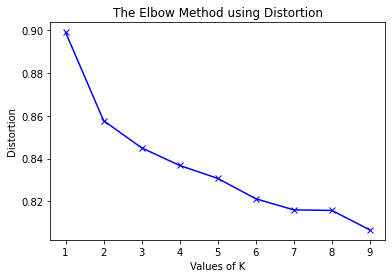

In [ ]:
plt.plot(range(1,10), distortions[:9], 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

for K in range (1,213)
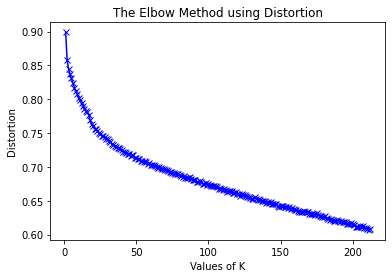

## Hierarchial clustering

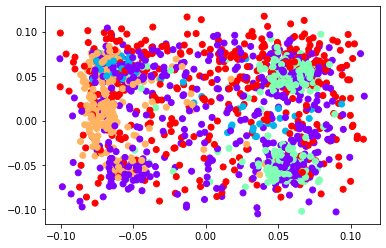

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [ ]:
print(cluster.labels_)

[3 0 0 ... 0 0 0]


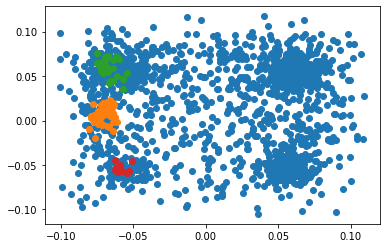

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where

from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define the model
model = DBSCAN(eps=0.30, min_samples=9)

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster

for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

In [ ]:
emojis=[]
for i in Xemoji:
  emojis.append(i)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128121 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128039 missing from current font.
  fon

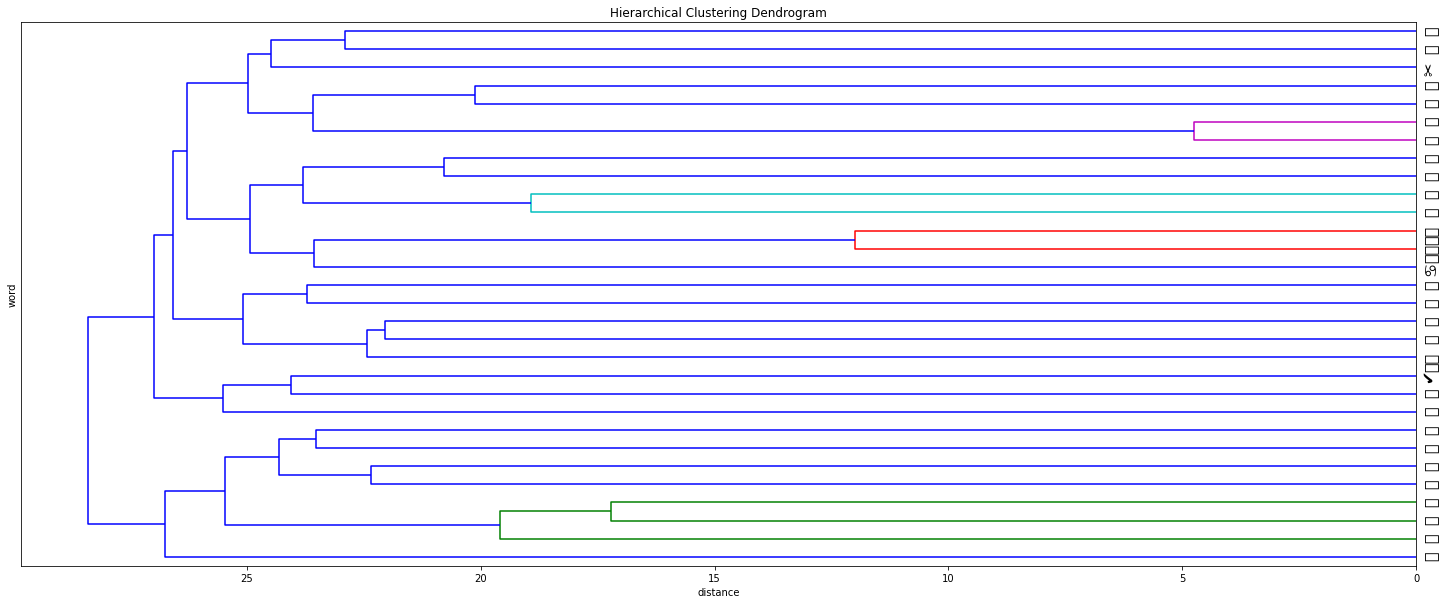

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

l = linkage(X[:30], method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(emojis[v])
)
plt.show()

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X[20:40], method='ward'),labels=emojis)


In [ ]:
emojis[20:40]

### Level 1

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  


In [ ]:
predicted=cluster.fit_predict(X)

In [ ]:
predicted[:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
#embeddings - predicted
mappings=dict()
groups={}
c=0
for i in model.wv.vocab.keys():
  mappings[i]=predicted[c]
  if(predicted[c] in groups.keys()):
    groups[predicted[c]].append(i)
  else:
    groups[predicted[c]]=[]
  c=c+1


AttributeError: ignored

In [ ]:
# import pandas as pd
# data_dict = groups
# data_items = data_dict.items()
# data_list = list(data_items)

# df = pd.DataFrame(data_list)

In [ ]:
# df.head()

In [ ]:
# print(len(groups[0]),len(groups[1]),len(groups[2]),len(groups[3]),len(groups[4]))

In [ ]:
emojis[:10]

['🇸🇰', '👔', '🌀', '🚾', '👹', '🚻', '👬', '🇫🇯', '🎧', '🐽']

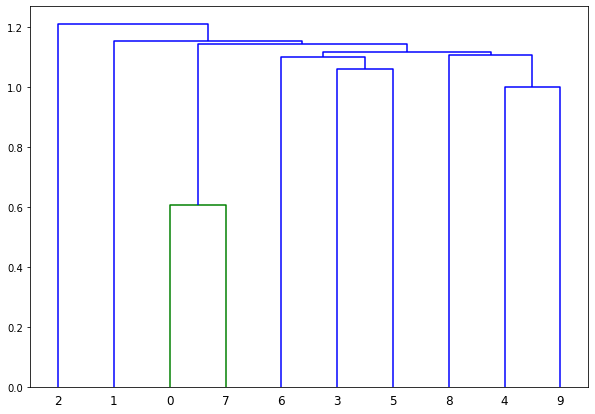

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X[:10], 'single')


plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
           get_leaves=True)
plt.show()

In [ ]:
linked

array([[ 0.        ,  7.        ,  0.60607192,  2.        ],
       [ 4.        ,  9.        ,  0.99953745,  2.        ],
       [ 3.        ,  5.        ,  1.06102733,  2.        ],
       [ 6.        , 12.        ,  1.10112218,  3.        ],
       [ 8.        , 11.        ,  1.10668181,  3.        ],
       [13.        , 14.        ,  1.11647926,  6.        ],
       [10.        , 15.        ,  1.14333066,  8.        ],
       [ 1.        , 16.        ,  1.15298774,  9.        ],
       [ 2.        , 17.        ,  1.20820328, 10.        ]])

In [ ]:
!pip install fastcluster

     |████████████████████████████████| 155 kB 5.1 MB/s 


In [ ]:
pip install -U numpy


     |████████████████████████████████| 15.7 MB 57 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from collections import defaultdict

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from fastcluster import linkage
import seaborn as sns
from matplotlib.colors import rgb2hex, colorConverter

link = linkage(X[:100], metric='correlation', method='ward')

#https://gist.github.com/vals/150ec97a5b7db9c82ee9
plt.figure(figsize=(10, 7))
den = dendrogram(link, above_threshold_color='#AAAAAA')
plt.xticks(rotation=90)
no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sns.despine(**no_spine);

plt.tight_layout()
plt.savefig('tree1.png');



print(den)

cluster_idxs = defaultdict(list)
for c, pi in zip(den['color_list'], den['icoord']):
    for leg in pi[1:3]:
        i = (leg - 5.0) / 10.0
        if abs(i - int(i)) < 1e-5:
            cluster_idxs[c].append(int(i))

cluster_idxs.keys()

In [ ]:
link = linkage(X[:100], metric='correlation', method='ward')


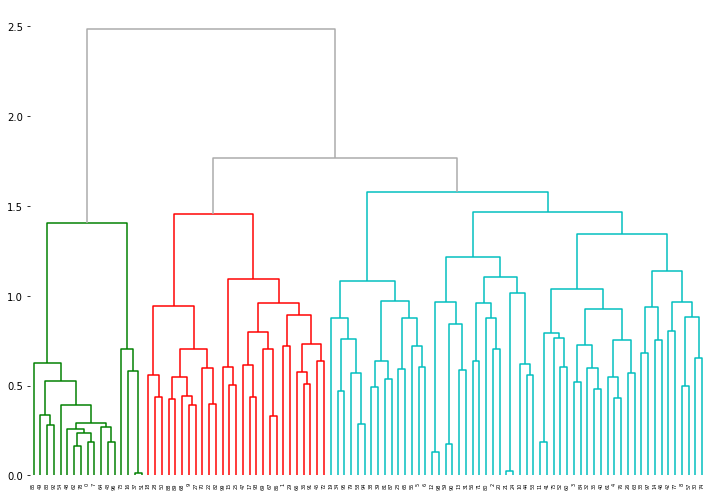

In [ ]:
#https://gist.github.com/vals/150ec97a5b7db9c82ee9
plt.figure(figsize=(10, 7))
den = dendrogram(link, above_threshold_color='#AAAAAA')
plt.xticks(rotation=90)
no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sns.despine(**no_spine);

plt.tight_layout()
plt.savefig('tree1.png');

In [ ]:
den


In [ ]:
cluster_idxs = defaultdict(list)
for c, pi in zip(den['color_list'], den['icoord']):
    for leg in pi[1:3]:
        i = (leg - 5.0) / 10.0
        if abs(i - int(i)) < 1e-5:
            cluster_idxs[c].append(int(i))

1. a dataframe - index number, vector, emoji
2. use the cluter idx to get more detailed clusters


In [ ]:
cluster_idxs.keys()

dict_keys(['g', 'r', 'c'])

In [ ]:
len(cluster_idxs)


3

In [ ]:
class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

In [ ]:
cluster_classes = Clusters()
for c, l in cluster_idxs.items():
    i_l = [den['ivl'][i] for i in l]
    cluster_classes[c] = i_l

In [ ]:
cluster_classes


g,"['0', '7']"
r,"['3', '5']"
c,"['1', '6']"
m,"['4', '9', '8']"
#AAAAAA,['2']


In [ ]:
print(cluster_classes._repr_html_())


<table style="border: 0;"><tr style="border: 0;"><td style="background-color: #008000; border: 0;"><code style="background-color: #008000;">g</code></td><td style="border: 0"><code>['0', '7']</code></td></tr><tr style="border: 0;"><td style="background-color: #ff0000; border: 0;"><code style="background-color: #ff0000;">r</code></td><td style="border: 0"><code>['3', '5']</code></td></tr><tr style="border: 0;"><td style="background-color: #00bfbf; border: 0;"><code style="background-color: #00bfbf;">c</code></td><td style="border: 0"><code>['1', '6']</code></td></tr><tr style="border: 0;"><td style="background-color: #bf00bf; border: 0;"><code style="background-color: #bf00bf;">m</code></td><td style="border: 0"><code>['4', '9', '8']</code></td></tr><tr style="border: 0;"><td style="background-color: #aaaaaa; border: 0;"><code style="background-color: #aaaaaa;">#AAAAAA</code></td><td style="border: 0"><code>['2']</code></td></tr></table>


In [ ]:
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

In [ ]:
link = linkage(X, metric='correlation', method='ward')


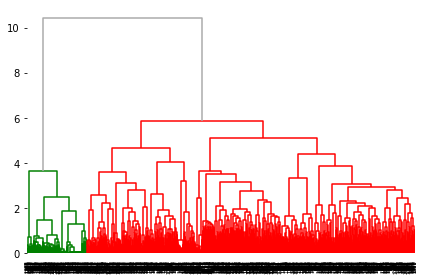

In [ ]:
den = dendrogram(link, above_threshold_color='#AAAAAA')
plt.xticks(rotation=90)
sns.despine(**no_spine);

plt.tight_layout()
plt.savefig('tree2.png');

In [ ]:
type(get_cluster_classes(den))

__main__.Clusters

In [ ]:
len(get_cluster_classes(den))

2

In [ ]:
get_cluster_classes(den)

Again get internal clusters for each group

### Level 2 - subgroup 1

In [ ]:
#group 0
X0=[]
for i in groups[0]:
  X0.append(list(e2v[i]))


X0=np.array(X0)

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X0, method='ward'),)
# plt.axhline(y=6, color='r', linestyle='--')

### Level 2 - subgroup 2

In [ ]:
X0=[]

for i in groups[1]:
  X0.append(list(e2v[i]))

X0=np.array(X0)

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X0, method='ward'))
# plt.axhline(y=6, color='r', linestyle='--')

# Extracting index from clusters

## Build dataframe of emoji index and vector

In [ ]:
!pip install fastcluster

In [ ]:
pip install -U numpy


     |████████████████████████████████| 15.7 MB 50 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas as pd
df=pd.DataFrame()

In [ ]:
import gensim.models as gsm

model = gsm.KeyedVectors.load_word2vec_format('/content/emoji2vec.bin', binary=True)

In [ ]:
Xemoji=model.wv.vocab.keys()
X=[]

for i in Xemoji:
  X.append(list(model[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
emojis=[]
for i in Xemoji:
  emojis.append(i)

In [ ]:
emojis[0]

In [ ]:
# model[emojis[8]]==X[8]

In [ ]:
df['emoji']=emojis
df['vector']=X

In [ ]:
emoji_clusters=dict()

In [ ]:
df.head()

In [ ]:
df.index

In [ ]:
# import numpy as np


NameError: ignored

In [ ]:
X=np.array(X)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from collections import defaultdict

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from fastcluster import linkage
import seaborn as sns
from matplotlib.colors import rgb2hex, colorConverter

In [ ]:
# select optimal number of clusters
#https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

AttributeError: ignored

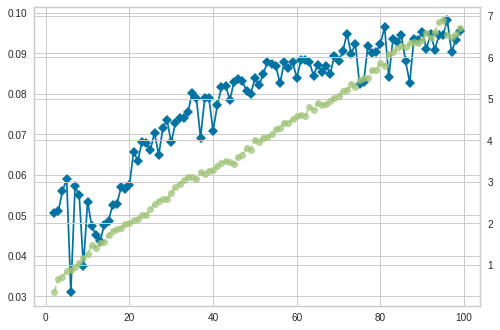

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model_ = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model_, k=(2,100),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

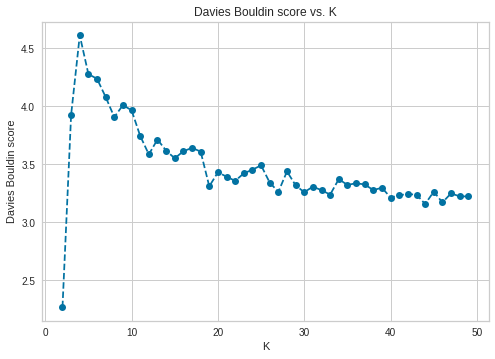

In [ ]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model_ = kmeans.fit_predict(X)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(X, model_)
    return score

scores = []
centers = list(range(2,50))
for center in centers:
    scores.append(get_kmeans_score(X, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

level 0

dict_keys(['g', 'r'])

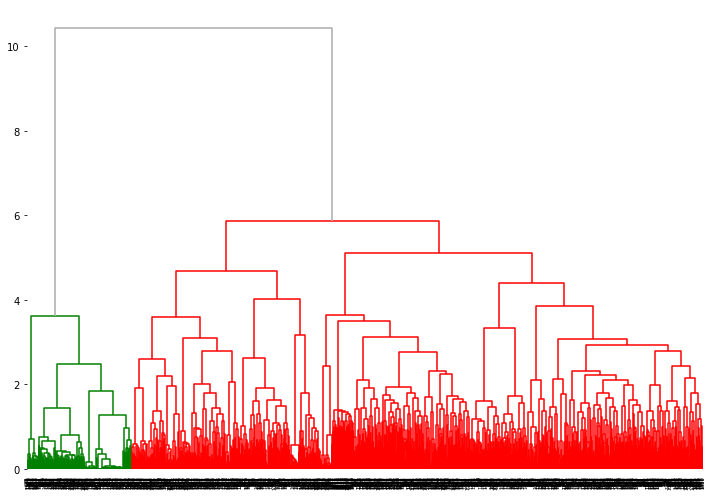

In [ ]:
link = linkage(X, metric='correlation', method='ward')

#https://gist.github.com/vals/150ec97a5b7db9c82ee9
plt.figure(figsize=(10, 7))
den = dendrogram(link, above_threshold_color='#AAAAAA')
plt.xticks(rotation=90)
no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sns.despine(**no_spine);

plt.tight_layout()
plt.savefig('tree1.png');

# print(den)

cluster_0 = defaultdict(list)
for c, pi in zip(den['color_list'], den['icoord']):
    for leg in pi[1:3]:
        i = (leg - 5.0) / 10.0
        if abs(i - int(i)) < 1e-5:
            cluster_0[c].append(int(i))

cluster_0.keys()

In [ ]:
def make_den(X):
    link = linkage(X, metric='correlation', method='ward')
    plt.figure(figsize=(10, 7))
    den = dendrogram(link, above_threshold_color='#AAAAAA')
    plt.xticks(rotation=90)
    no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
    sns.despine(**no_spine);

    plt.tight_layout()
    plt.savefig('tree1.png');

    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    return cluster_idxs

In [ ]:
def make_cluster_from_df(cluster_idxs, df):
  cluster_collec_idx=[]

  for i in cluster_idxs.keys():
    index=cluster_idxs[i]
    X=[]
    for j in index:
      X.append(df['vector'][j])
    
    idx=make_den(X)
    cluster_collec_idx.append(idx)

  return cluster_collec_idx

In [ ]:
def cluster_emojis(cluster_idx, df):
  emoji_dict=dict()
  k=0
  for i in cluster_idx.keys():
    emojis=[]
    for j in cluster_idx[i]:
      emojis.append(df['emoji'][j])
    emoji_dict[k]=emojis
    k=k+1
    
  return emoji_dict

In [ ]:
cluster_0.keys()

In [ ]:
df['emoji'][cluster_0['g'][0]]

In [ ]:
emoji_clusters[0]=cluster_emojis(cluster_0,df)

In [ ]:
emoji_clusters.keys()

In [ ]:
emoji_clusters[0].keys()

level 0 -> level 1 [2 clusters]

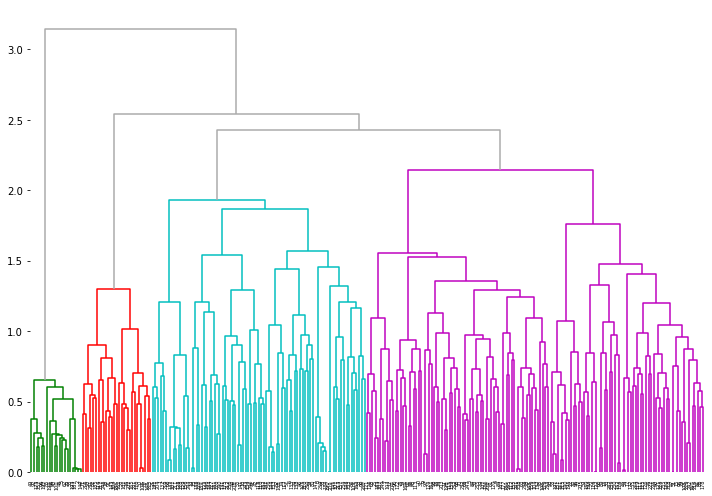

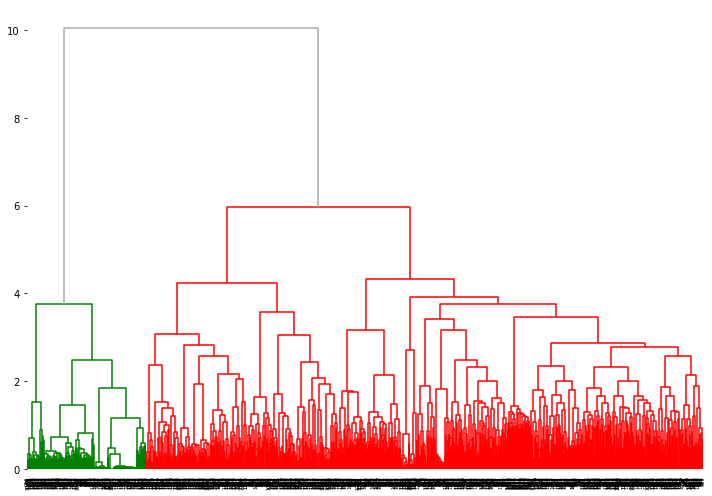

In [ ]:
cluster_1=make_cluster_from_df(cluster_0,df)

In [ ]:
len(cluster_1)

In [ ]:
cluster_1[0].keys()

In [ ]:
cluster_1[1].keys()

level 1-> level 2

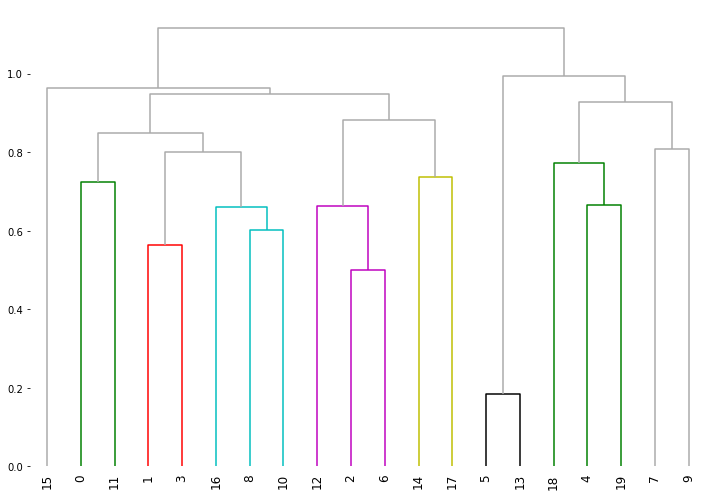

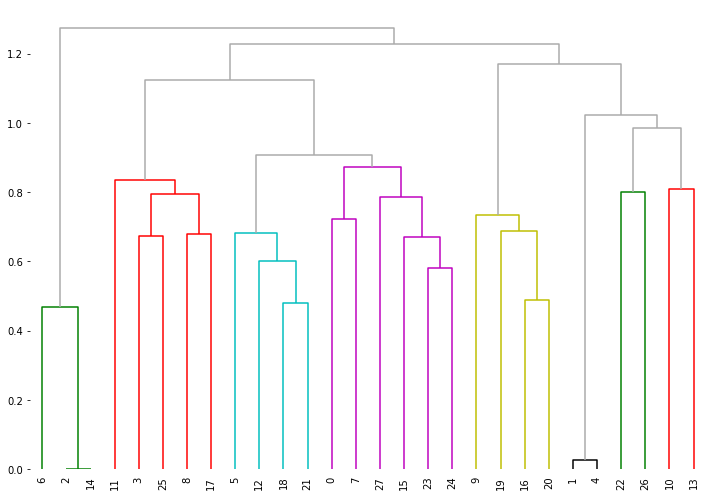

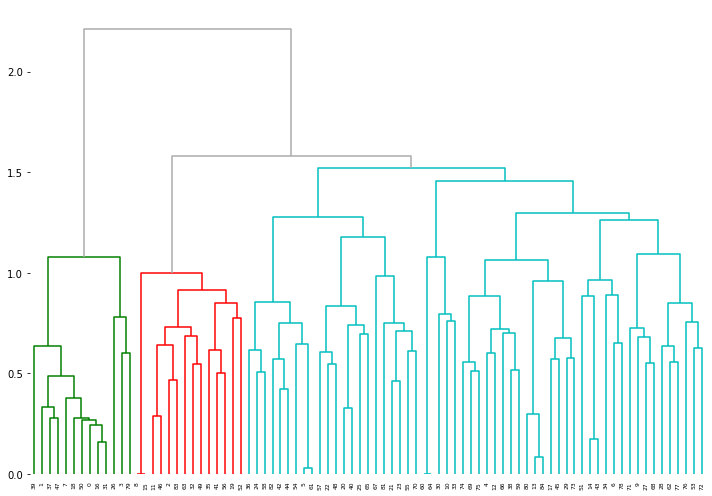

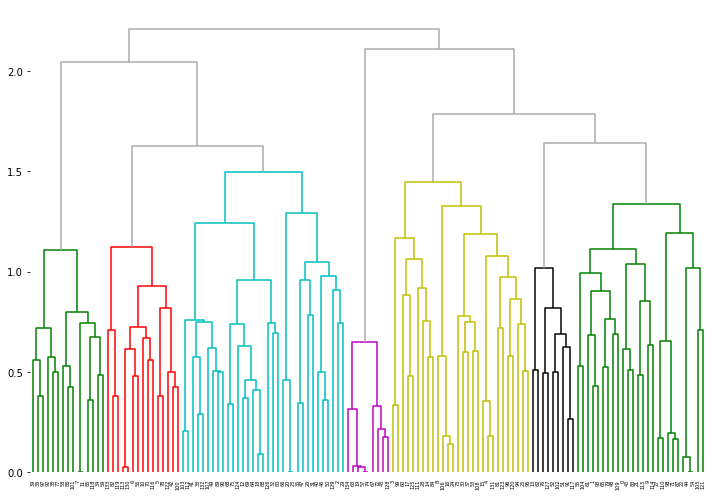

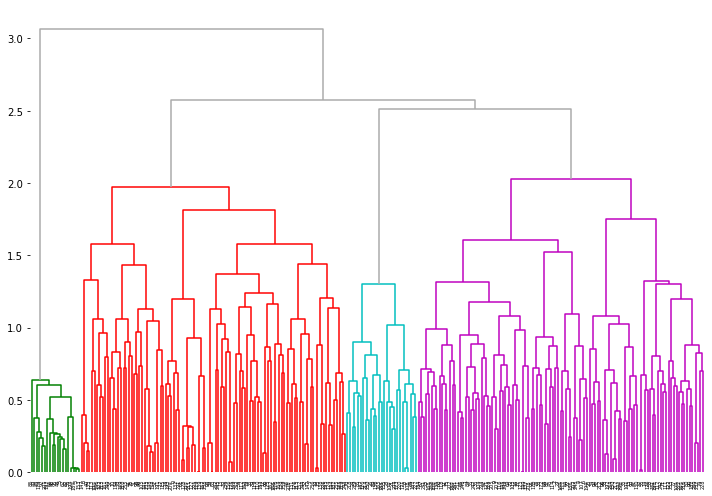

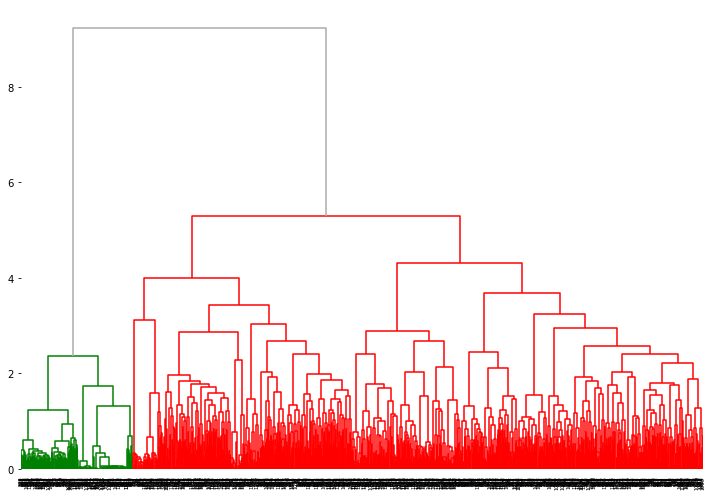

In [ ]:
cluster_10=make_cluster_from_df(cluster_1[0],df)
cluster_11=make_cluster_from_df(cluster_1[1],df)

In [ ]:
cluster_emojis(cluster_1[0],df)

In [ ]:
len(cluster_1)

2

In [ ]:
cluster_1[0].keys()

dict_keys(['g', 'r', 'c', 'm'])

In [ ]:
len(cluster_10)

4

In [ ]:
cluster_10[0].keys()

dict_keys(['g', 'r', 'c', 'm', 'y', '#AAAAAA', 'k'])

In [ ]:
for i in range(len(cluster_10)):
  print(i)
  print(cluster_emojis(cluster_10[i],df))

0
{0: ['👔', '🌀', '✔️', '🙎🏼', '💈'], 1: ['🚾', '👹'], 2: ['👬', '🇫🇯', '🚻'], 3: ['🐽', '🚜', '🎧'], 4: ['♋', '🚭'], 5: ['🇸🇰', '🍸', '🤷'], 6: ['🚷', '📅']}
1
{0: ['👔', '🌀', '🇸🇰', '🚔', '👚'], 1: ['👹', '🚻', '👬', '🇫🇯', '🚾', '🐧', '🍥'], 2: ['🚜', '♋', '🐽', '🎧'], 3: ['🚭', '🚷', '✔️', '🙎🏼', '💈', '📅'], 4: ['🌂', '🚓', '🤷', '🍸'], 5: ['🍤', '💘'], 6: ['🚔']}
2
{0: ['🌀', '🚾', '👔', '🎧', '🐽', '🇫🇯', '👬', '🚻', '👹', '🇸🇰', '♋', '🚭', '🚜'], 1: ['🚷', '📅', '💈', '✔️', '🙎🏼', '🍸', '🌂', '🚓', '🤷', '💘', '🚔', '🍤', '👚', '🐧'], 2: ['🍵', '✂️', '🍥', '⛔', '💂', '👓', '😕', '🎎', '🆔', '❗', '💭', '🏊🏻', '💬', '🎴', '♉', '⚖', '⬅️', '📒', '😡', '🇲🇦', '🛵', '🇮🇩', '👓', '🇨🇭', '🍦', '🌐', '🎡', '❗️', '🤒', '🔓', '🇿🇲', '🎻', '😹', '👽', '🌝', '🚮', '🐆', '🇰🇵', '🇭🇺', '💔', '🎅🏻', '👇🏽', '🍆', '🐖', '😮', '👃🏽', '➗', '⌚', '✴️', '🗻', '🇨🇺', '👻', '🆎', '💣', '💁', '😟', '🇬🇭', '🎩', '🦀']}
3
{0: ['👔', '🌀', '🇸🇰', '👹', '🚻', '🚾', '🇫🇯', '🎧', '👬', '🐽', '🚜', '♋', '🚭', '🚷', '📅', '♋', '😩', '🎉', '🥡', '⚫️', '🤐', '🏣', '🌹', '🌯', '🎆', '🔮', '🙌', '▶️', '🆚', '🙆', '🎒', '💆', '🔰', '🌜', '🎑', '😳', '🌕', '🐫', '♐

In [ ]:
for i in range(len(cluster_11)):
  print(i)
  print(cluster_emojis(cluster_11[i],df))

0
{0: ['👹', '🚻', '🚾', '🌀', '👔', '🎧', '🐽', '🚭', '🚷', '♋', '🚜', '🇫🇯', '👬', '🙎🏼', '🍸', '✔️', '💈', '📅', '🇸🇰'], 1: ['🚓', '🍤', '🌂', '🤷', '💘', '🚔', '🐧', '🍥', '👚', '🍵', '✂️', '⛔', '💂', '👓', '🆔', '😕', '🎎', '🏊🏻', '❗', '💭', '💬', '🎴', '♉', '⚖', '⬅️', '📒', '🛵', '🇮🇩', '😡', '🇲🇦', '🇨🇭', '🍦', '🌐', '🎡', '❗️', '🤒', '🔓', '🇿🇲', '🎻', '😹', '🚮', '👽', '🌝', '🇭🇺', '🐆', '🇰🇵', '💔', '🎅🏻', '🚮', '🍆', '👃🏽', '👇🏽', '🐖', '😮', '✴️', '➗', '🆎', '👻', '⌚', '🗻', '🇨🇺', '💣', '💁', '😟', '🇬🇭', '🎩', '👉🏾', '🙊', '🇼', '🦀', '🍚', '🍙', '🚯', '👩🏿', '🇫🇷', '👸🏼', '😲', '🇲🇰', '😿', '🔢', '🚬', '🏀', '🍷', '💅', '🙈', '👭', '🍯', '🏰', '🖨', '🍨', '🍯', '🆗', '😩', '🎉', '🤐', '⚫️', '🏣', '🥡', '🌹', '🌯', '▶️', '🔮', '🎆'], 2: ['🙌', '🆚', '🙆', '🎒', '💆', '🔰', '🌕', '🎑', '🌜', '⚓', '🐫', '😳', '♐', '👂', '🙆', '🍣', '🏧', '🐼', '💃', '\ue50a', '🎠', '🌴', '🛅', '💶', '😏', '♎', '🏫', '⚽'], 3: ['🇸🇮', '🔒', '😃', '⛺', '🚥', '🍺', '💀', '💵', '♣️', '🔔', '🐜', '🌅', '💉', '💯', '🙆🏿', '👣', '🍌', '🍕', '🥔', '🐸', '👃🏻', '🍮', '💞', '👵🏽', '🚣', '💕', '🚦', '🇳🇬', '👃🏻', '🏂', '👎', '🐾', '🐀', '🚝', '🛣', '🎈', '😻', '🇭🇳'

level 2

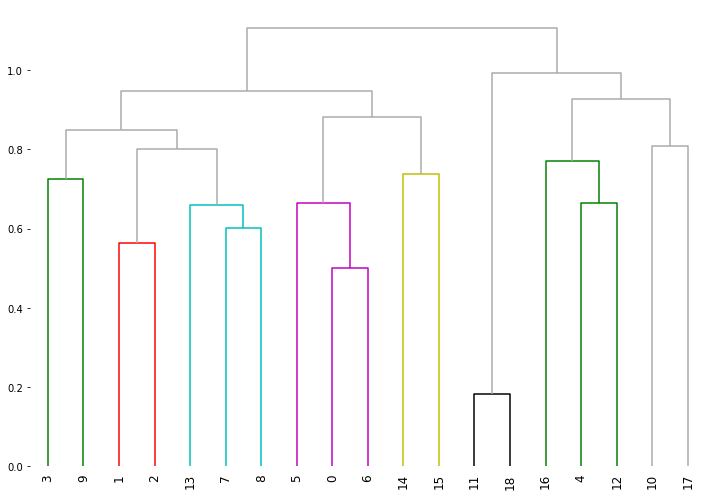

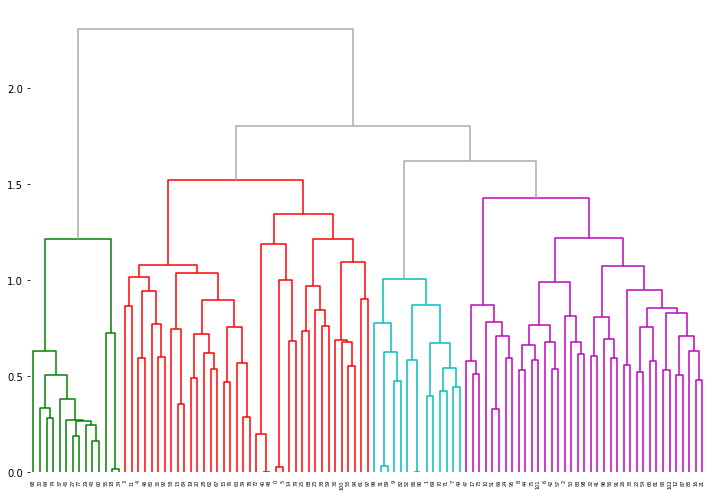

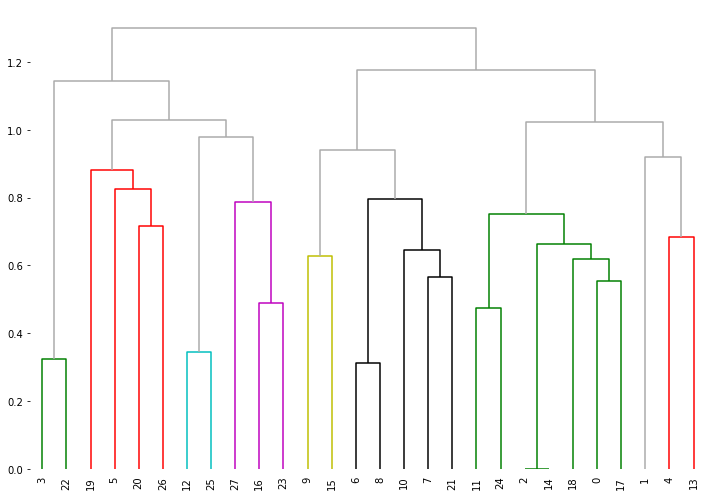

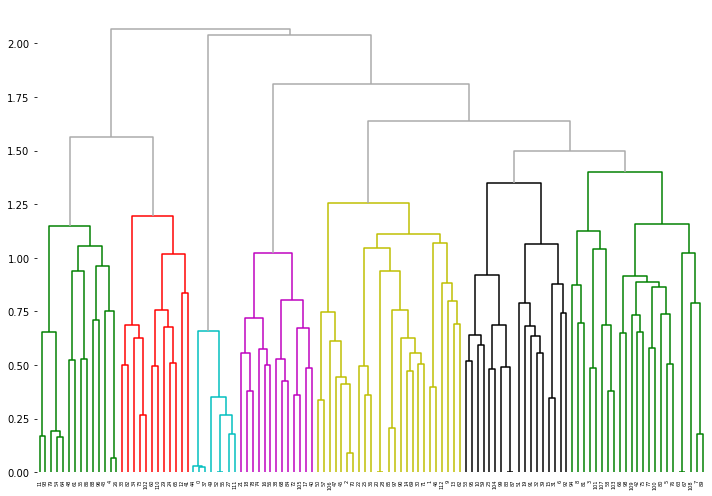

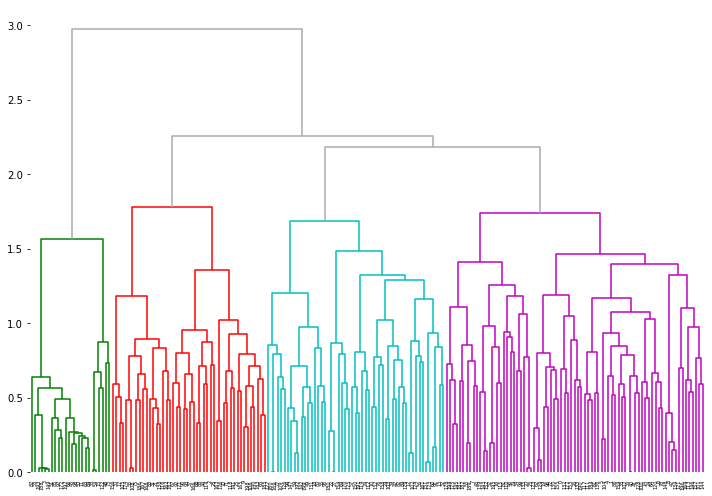

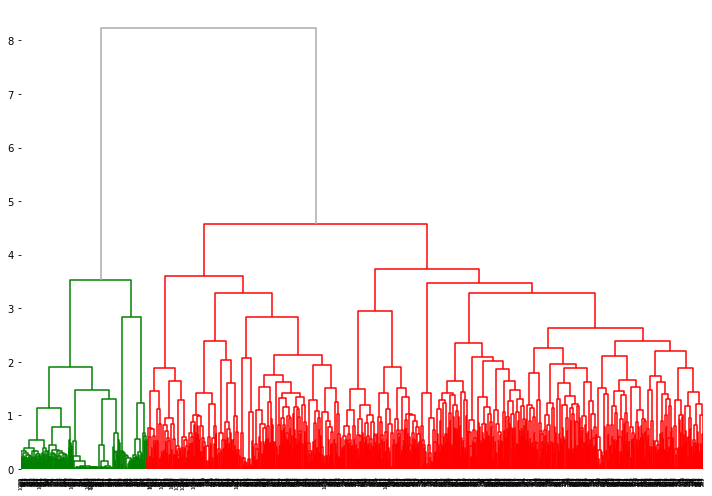

In [ ]:
cluster_20= make_cluster_from_df(cluster_11[0],df)
cluster_21= make_cluster_from_df(cluster_11[1],df)

In [ ]:
for i in range(len(cluster_20)):
  print(i)
  print(cluster_emojis(cluster_20[i],df))

0
{0: ['🇸🇰', '👔', '💈', '✔️', '📅'], 1: ['🌀', '🚾'], 2: ['🚻', '👬', '👹'], 3: ['🎧', '🐽', '🇫🇯'], 4: ['🚜', '♋'], 5: ['🚭', '🚷'], 6: ['🙎🏼', '🍸']}
1
{0: ['🌀', '🚾', '👔', '👬', '🇫🇯', '🐽', '🚜', '🎧', '🚻', '👹', '🇸🇰', '🚭', '🚷', '♋'], 1: ['📅', '💈', '✔️', '🙎🏼', '🤷', '🌂', '🍸', '🍤', '💘', '🚓', '🚔', '👚', '🍥', '🍵', '🐧', '✂️', '👓', '💂', '🆔', '⛔', '🎎', '🏊🏻', '😕', '❗', '💭', '💬', '🎴', '♉', '⚖', '🛵', '⬅️', '🇮🇩', '🇲🇦', '🇨🇭', '😡', '📒', '🍦', '❗️'], 2: ['🎡', '🇿🇲', '🤒', '🔓', '🌐', '😹', '🚮', '🎻', '👽', '🌝', '🇭🇺', '🐆', '🇰🇵', '💔', '🇭🇺'], 3: ['👇🏽', '🍆', '🎅🏻', '🐖', '😮', '✴️', '➗', '👃🏽', '⌚', '🆎', '👻', '🗻', '😟', '💣', '🇨🇺', '🇬🇭', '🎩', '🦀', '💁', '🇼', '👉🏾', '🍚', '🍙', '🙊', '🚯', '👩🏿', '🇫🇷', '👸🏼', '😿', '😲', '🇲🇰', '🔢', '🚬', '💅', '🍷', '🙈', '🏀']}
2
{0: ['🇸🇰', '👔', '🍸', '🤷', '🌂', '🚓', '💘', '🚔', '🍤'], 1: ['👹', '🚻', '🚾', '🌀', '🐧', '🍥'], 2: ['👬', '🇫🇯'], 3: ['🐽', '🚜', '🎧'], 4: ['♋', '🚭'], 5: ['🚷', '📅', '✔️', '🙎🏼', '💈'], 6: ['👚']}
3
{0: ['🇸🇰', '👔', '🚾', '👹', '🌀', '🚻', '👬', '🇫🇯', '🎧', '🐽', '🚜', '🚭', '🚷', '♋', '👩🏿', '🇫🇷', '🚯', '👸🏼', '😿', '🇲🇰',

In [ ]:
for i in range(len(cluster_21)):
  print(i)
  print(cluster_emojis(cluster_21[i],df))

0
{0: ['👹', '🚻', '🚾', '🌀', '👔', '🎧', '🐽', '🇫🇯', '👬', '🚭', '🚷', '✔️', '🙎🏼', '💈', '📅', '♋', '🚜', '🇸🇰', '🍸', '🤷', '🌂', '🚓', '🍤', '💘', '🚓'], 1: ['🐧', '🍥', '👚', '🚔', '✂️', '👓', '🍵', '⛔', '💂', '🆔', '😕', '❗', '💭', '🏊🏻', '🎎', '🎴', '♉', '💬', '🇮🇩', '🛵', '⚖', '⬅️', '📒', '😡', '🇲🇦', '🇨🇭', '🍦', '❗️', '🌐', '🎡', '🇿🇲', '🌐', '🤒', '🔓', '🎻', '😹', '🚮', '👽', '🌝', '🇭🇺', '🐆', '🇰🇵', '💔', '🎅🏻', '🍆', '👃🏽', '👇🏽'], 2: ['😮', '✴️', '⌚', '🆎', '➗', '🐖', '🇨🇺', '😟', '🗻', '👻', '💣', '💁', '🦀', '🇬🇭', '👉🏾', '🙊', '🇼', '🎩', '🍙', '🚯', '🍚', '👸🏼', '😿', '🇫🇷', '👩🏿', '🇲🇰', '🔢', '😲', '💅', '🏀', '🚬', '🍷', '🙈', '👭', '🍯', '🏰', '🖨', '🍨', '🆗', '🎉', '🤐', '😩', '🥡', '⚫️', '🌹', '🌯', '🏣', '🎆', '▶️', '🔮', '🙌', '🆚', '🙆', '🔮'], 3: ['🔰', '🌜', '💆', '🎒', '🌕', '🎑', '😳', '⚓', '🐫', '♐', '😳', '\ue50a', '💃', '👂', '🐼', '🍣', '🏧', '🎠', '🛅', '💶', '😏', '🌴', '⚽', '♎', '😃', '🇸🇮', '🏫', '⛺', '🚥', '🔒', '💵', '🍺', '🌅', '🐜', '💀', '🔔', '🙆🏿', '♣️', '🍕', '👣', '💯', '💉', '🥔', '🐸', '🍌', '👃🏻', '🍮', '💞', '👵🏽', '🚦', '🚣', '🇳🇬', '🐾', '🏂', '💕', '👎', '🐀', '🚝', '😻', '🎈', '🐅', '🛣', 